# Simple MLP model
A simple MLP contains only one hidden layer. We supply a data matrix to the input to have the same input as for the transformers. So we first need to flatten the matrix into a vector that can be run through the net.

This notebook presents the results achieved using the multi-step forecasting model.

In [1]:
import inference_helpers

import torch
from config import get_config

import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
from importlib import reload
reload(inference_helpers)

<module 'inference_helpers' from 'c:\\Users\\obhlivoj\\DP\\System-Imbalance-Forecasting\\models\\ML\\inference_helpers.py'>

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
cfg = get_config()

Using device: cuda


We present summary statistics on validation data. To measure error, it was used RMSE, MAE and R2 score. The error is computed for every prediction separately.

In [4]:
params = ('hidden_dim', 'dropout')

In [5]:
best_metrics, best_models_inds, data_dict = inference_helpers.get_best_model(cfg, './loss/runfinal_nfl_')
loss_validation, loss_cat, preds_gt = inference_helpers.validate_n_models(device, 'final_nfl_', params, best_models_inds, eval_data="val")

MODEL EVAL - #1
--------------------


100%|██████████| 14/14 [00:00<00:00, 136.84it/s]

--------------------


MODEL EVAL - #2
--------------------


100%|██████████| 14/14 [00:00<00:00, 305.17it/s]

--------------------


MODEL EVAL - #3
--------------------


100%|██████████| 14/14 [00:00<00:00, 298.67it/s]

--------------------


MODEL EVAL - #4
--------------------


100%|██████████| 14/14 [00:00<00:00, 206.44it/s]

--------------------


MODEL EVAL - #5
--------------------


100%|██████████| 14/14 [00:00<00:00, 326.67it/s]

--------------------


MODEL EVAL - #6
--------------------


100%|██████████| 14/14 [00:00<00:00, 318.73it/s]

--------------------


MODEL EVAL - #7
--------------------


100%|██████████| 14/14 [00:00<00:00, 215.85it/s]

--------------------


MODEL EVAL - #8
--------------------


100%|██████████| 14/14 [00:00<00:00, 275.09it/s]

--------------------
Time-step	Error
1		13317.37
2		19539.81
3		21823.49
4		23858.16
5		25672.86
6		26846.13
7		27239.11
8		27393.05


In [7]:
res = inference_helpers.compute_val_errors(preds_gt, 8)

Model	RMSE	MAPE	MAE	R2
1	115.40	2.93	86.52	0.56
2	139.78	2.66	103.71	0.36
3	147.73	2.76	108.57	0.28
4	154.46	2.91	113.63	0.21
5	160.23	2.77	117.15	0.15
6	163.85	2.54	119.34	0.12
7	165.04	2.47	119.66	0.10
8	165.51	2.54	120.17	0.10


In [8]:
loss_validation, loss_cat, preds_gt = inference_helpers.validate_n_models(device, 'final_nfl_', params, best_models_inds, eval_data="test")

MODEL EVAL - #1
--------------------


100%|██████████| 14/14 [00:00<00:00, 262.32it/s]

--------------------


MODEL EVAL - #2
--------------------


100%|██████████| 14/14 [00:00<00:00, 326.56it/s]

--------------------


MODEL EVAL - #3
--------------------


100%|██████████| 14/14 [00:00<00:00, 280.60it/s]

--------------------


MODEL EVAL - #4
--------------------


100%|██████████| 14/14 [00:00<00:00, 304.96it/s]

--------------------


MODEL EVAL - #5
--------------------


100%|██████████| 14/14 [00:00<00:00, 286.47it/s]

--------------------


MODEL EVAL - #6
--------------------


100%|██████████| 14/14 [00:00<00:00, 326.48it/s]

--------------------


MODEL EVAL - #7
--------------------


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]

--------------------


MODEL EVAL - #8
--------------------


100%|██████████| 14/14 [00:00<00:00, 275.09it/s]

--------------------
Time-step	Error
1		11895.78
2		17983.73
3		20262.82
4		22059.61
5		23896.12
6		24826.54
7		25111.05
8		25514.18


In [10]:
res = inference_helpers.compute_val_errors(preds_gt, 8)

Model	RMSE	MAPE	MAE	R2
1	109.07	3.86	81.07	0.56
2	134.10	3.81	97.57	0.34
3	142.35	4.05	103.11	0.25
4	148.52	3.97	106.92	0.19
5	154.58	3.64	109.80	0.12
6	157.56	3.52	111.66	0.08
7	158.46	3.61	112.12	0.07
8	159.73	3.30	112.14	0.06


The visual results are shown in the following graphs. Plotted are the k best, worst and random predictions against the average RMSE over all prediction steps.

In [12]:
seq_data = inference_helpers.group_data(preds_gt)

rmse_data = np.empty(len(seq_data), dtype=np.float32)
for ind, dp in enumerate(seq_data):
    rmse_data[ind] = mean_squared_error(dp['true'], dp['pred'], squared=False)

# get k random, best and worst predictions
k = 3
min_loss_inds = np.argsort(rmse_data)[:k].tolist()
max_loss_inds = np.argsort(rmse_data)[-k:].tolist()
rand_inds = np.random.randint(0, len(rmse_data), size=k).tolist()

### Bad predictions

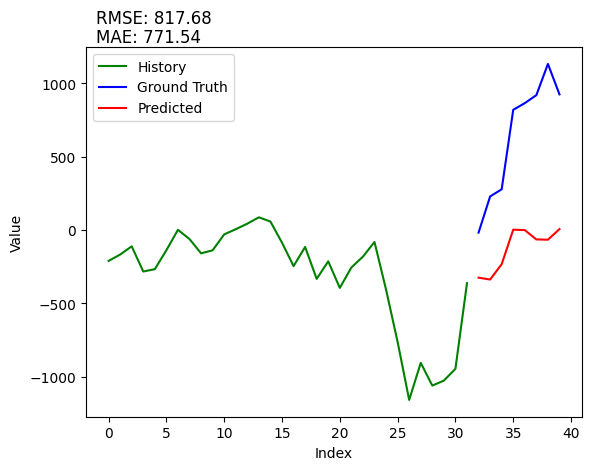

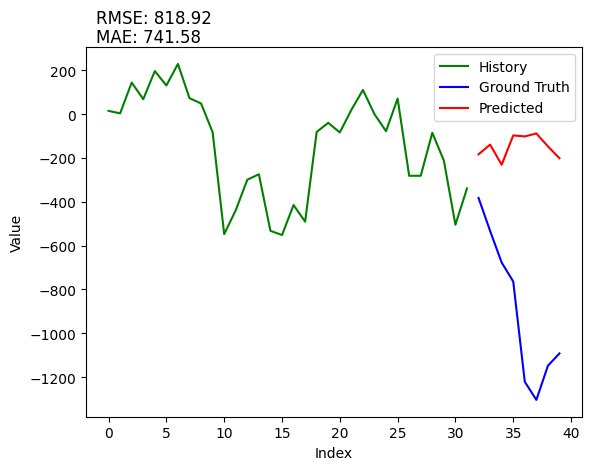

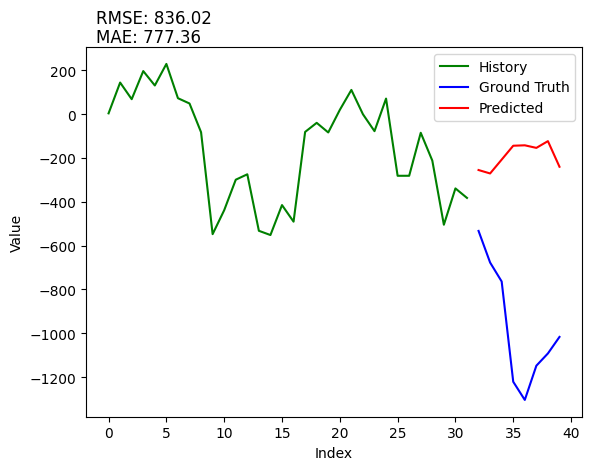

In [13]:
inference_helpers.plot_k_results(seq_data, max_loss_inds)

### Good predictions

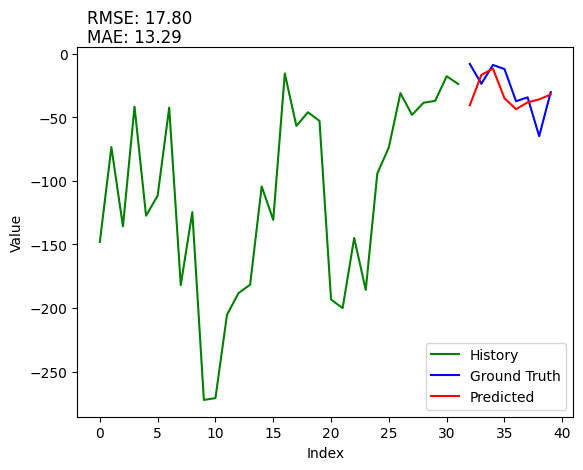

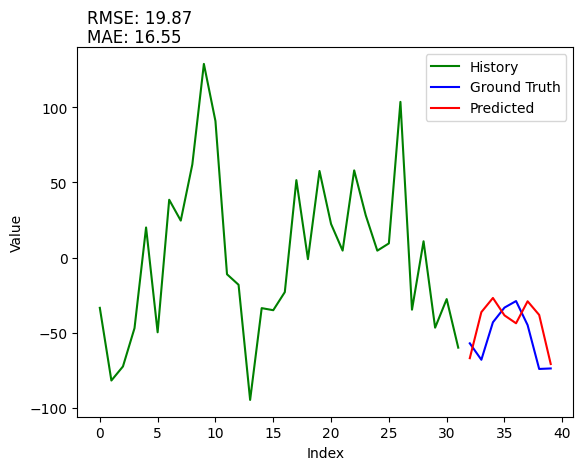

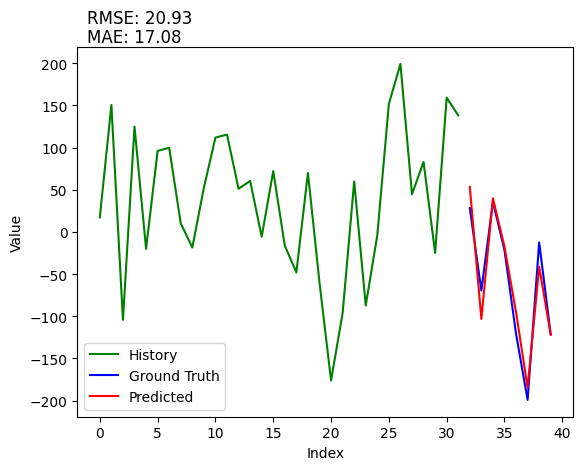

In [14]:
inference_helpers.plot_k_results(seq_data, min_loss_inds)

### Random predictions

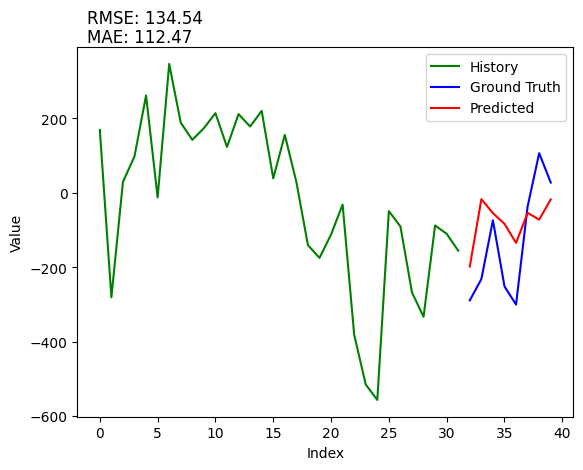

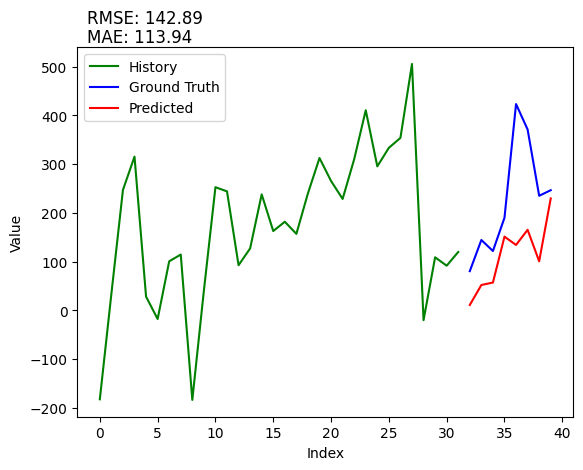

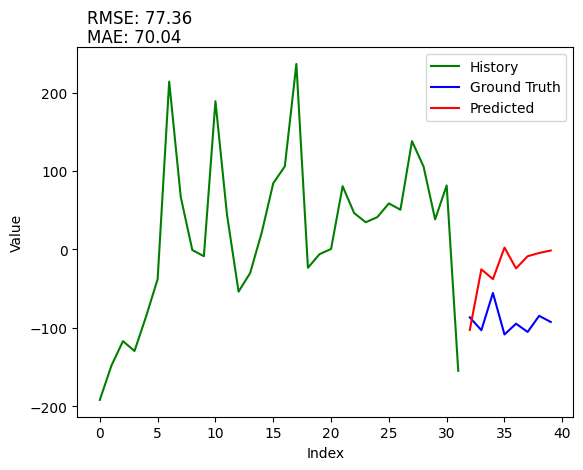

In [15]:
inference_helpers.plot_k_results(seq_data, rand_inds)